In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

### Load data and validate

In [25]:
# load calendar data for Seattle Air BnB
df = pd.read_csv('./calendar.csv')
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [26]:
#check for null values and provide columns with no missing values
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

no_nulls

{'available', 'date', 'listing_id'}

In [27]:
# Explore the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [28]:
#the only columns with missing values, makes sense to convert these to $0
df['price'].fillna('$0', inplace=True)

In [29]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,$0
3,241032,2016-01-07,f,$0
4,241032,2016-01-08,f,$0


In [30]:
#remove symbols for ease of analysis 
df['price'] = df['price'].apply(lambda x:''.join(x.split(',')))
df['price'] = df['price'].apply(lambda x:float(x.split('$')[1]))
df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,0.0
1393566,10208623,2016-12-30,f,0.0
1393567,10208623,2016-12-31,f,0.0
1393568,10208623,2017-01-01,f,0.0


In [34]:
# re-code availability column to allow for easier analysis 1 for available 0 for not available
df['available'] = df['available'].replace(['t'],1)
df['available'] = df['available'].replace(['f'],0)
df['month'] = df['date'].apply(lambda x: x.split('-')[1])

In [35]:
df

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,01
1,241032,2016-01-05,1,85.0,01
2,241032,2016-01-06,0,0.0,01
3,241032,2016-01-07,0,0.0,01
4,241032,2016-01-08,0,0.0,01
...,...,...,...,...,...
1393565,10208623,2016-12-29,0,0.0,12
1393566,10208623,2016-12-30,0,0.0,12
1393567,10208623,2016-12-31,0,0.0,12
1393568,10208623,2017-01-01,0,0.0,01


### Analysis

#### 1. How many places are availble in each month? Is there any pattern to this (chart)?

In [46]:
avail_per_month = df.groupby(['month']).sum()
avail_per_month.reset_index(inplace=True)
avail_per_month

,month,listing_id,available,price
0,01,635709761880,64937,7981548.0
1,02,614519436484,73321,9113355.0
2,03,656900087276,83938,10798161.0
3,04,635709761880,76037,10272371.0
4,05,656900087276,79971,11159008.0
5,06,635709761880,77244,11391415.0
6,07,656900087276,74222,11288732.0
7,08,656900087276,76347,11502179.0
8,09,635709761880,77246,11065949.0
9,10,656900087276,82438,11296639.0


#### Chart showing how many places are available in each month.

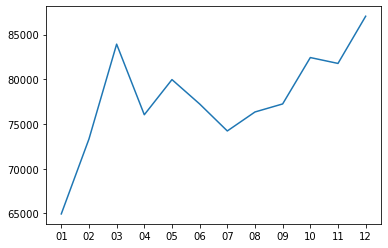

In [41]:
plt.plot(avail_per_month['month'], avail_per_month['available'])

#### 2. What is the total amount of earning potential remaining for each listing? 

In [42]:
cost_per_id = df.groupby(['listing_id']).sum()
cost_per_id.reset_index(inplace=True)
cost_per_id

,listing_id,available,price
0,3335,309,37080.0
1,4291,365,29930.0
2,5682,309,16669.0
3,6606,365,33890.0
4,7369,53,4505.0
...,...,...,...
3813,10332096,365,14600.0
3814,10334184,361,43320.0
3815,10339144,0,0.0
3816,10339145,365,86835.0


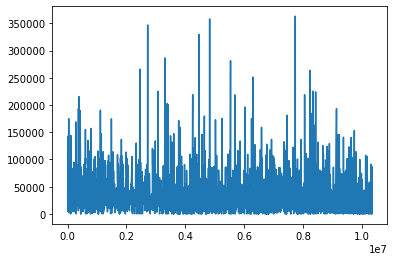

In [43]:
plt.plot(cost_per_id['listing_id'], cost_per_id['price'])

### 3. Is there any corelation between the number of available listings and their price?

In [48]:
# correlation between Col1 and Col2
avail_per_month['month'] = avail_per_month['month'].map(int)
avail_per_month['month'].corr(avail_per_month['price'])

0.7818662298704191